# Tarea 02: Aplicación de Machine Learnign en el Conjunto de Datos Iris


## Objetivo
El propósito de esta tarea es realizar un análisis y aplicación de Machine Learning en el conjunto de 
datos Iris, utilizando el algoritmo de k-Nearest Neighbors (KNN). Se espera que el participante 
descargue el conjunto de datos desde Kaggle, realice una exploración detallada de las 
características y, posteriormente, implemente y evalúe el modelo de Machine Learning.

## Descarga del Conjunto de Datos
Descargar el conjunto de datos desde Kaggle mediante el siguiente 
enlace: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

Después de la descarga correspondiente del conjunto de datos, ubicar el archivo en el mismo directorio del notebook y realizar la carga del archivo por medio de la librería de pandas

In [55]:
# Importar Pandas para realizar la lectura de los datos descargados
import pandas as pd

# Cargar el conjunto de datos
iris_flower_dataset = pd.read_csv("IRIS.csv")

## Lectura y análisis del Dataset

Al realizar la carga del conjunto de datos se puede realizar una lectura y análisis de los componentes y parámteros que lo conforman

In [56]:
#Infromacion de las filas
print(iris_flower_dataset.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [45]:
#Informacion resumida del detalle de las columnas
print(iris_flower_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [46]:
# Distribución de las cantidades de las diferentes especies de flores
print("Total de especies del conjunto de datos")
print(iris_flower_dataset["species"].count(),"\n")

print("Distribucion de especies del conjunto de datos")
print(iris_flower_dataset["species"].value_counts())


Total de especies del conjunto de datos
150 

Distribucion de especies del conjunto de datos
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [47]:
# Estadisticas sobre las caracteristicas de los datos
print(iris_flower_dataset.describe())


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Visualización y análisis de características
 

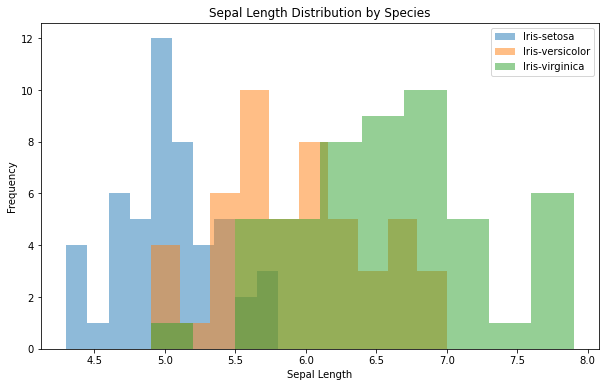

In [48]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Iterar sobre cada grupo de especies
for species, group in iris_flower_dataset.groupby('species'):
    plt.hist(group['sepal_length'], bins=10, alpha=0.5, label=species)

# Configurar etiquetas y título
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Sepal Length Distribution by Species')

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

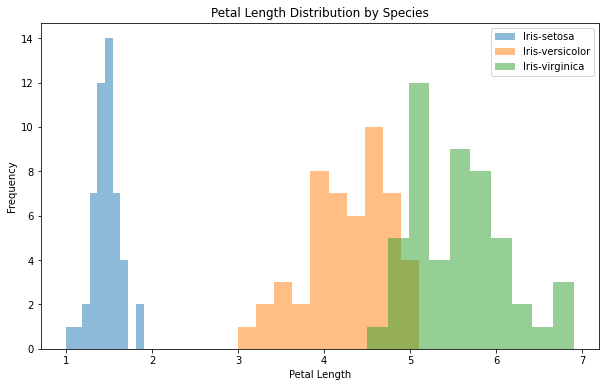

In [49]:
plt.figure(figsize=(10, 6))

# Iterar sobre cada grupo de especies
for species, group in iris_flower_dataset.groupby('species'):
    plt.hist(group['petal_length'], bins=10, alpha=0.5, label=species)

# Configurar etiquetas y título
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Petal Length Distribution by Species')

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

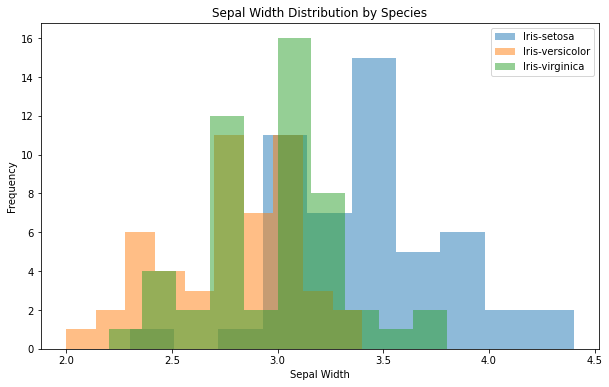

In [50]:
plt.figure(figsize=(10, 6))

# Iterar sobre cada grupo de especies
for species, group in iris_flower_dataset.groupby('species'):
    plt.hist(group['sepal_width'], bins=10, alpha=0.5, label=species)

# Configurar etiquetas y título
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('Sepal Width Distribution by Species')

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

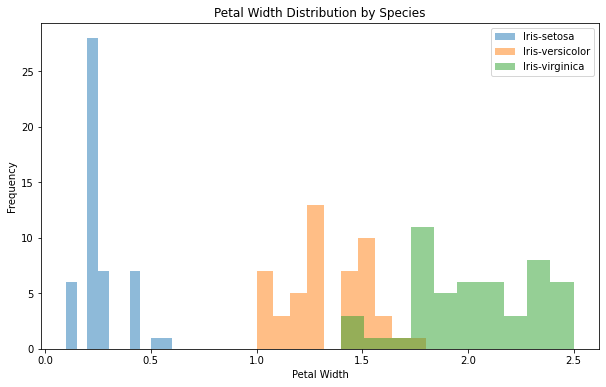

In [51]:
plt.figure(figsize=(10, 6))

# Iterar sobre cada grupo de especies
for species, group in iris_flower_dataset.groupby('species'):
    plt.hist(group['petal_width'], bins=10, alpha=0.5, label=species)

# Configurar etiquetas y título
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Petal Width Distribution by Species')

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

In [52]:
## Implementación de K-Nearest Neighbors (KNN)
from scipy.stats import mode

In [108]:

class KNN():
    def __init__(self, dataFrameTraining, dataFrameTesting, number_neighbors, classes):
        self.dataFrameTraining = dataFrameTraining
        self.dataFrameTesting = dataFrameTesting
        self.number_neighbors = number_neighbors
        self.neigh_ind = []
        self.classes = classes
    
    # (samples, feature1, feature2)
    def euclidean_distance(self, a, b):
        #Ejecuta la formula para cada sample del conjunto de datos AXIS = 1
        return np.sqrt(np.sum((a-b)**2, axis=1))

    def computeDistances(self):
        # (N, len(dataFrameTraining))
        point_dist = []
        for i, data in self.dataFrameTesting.iterrows():
            point_dist += [self.euclidean_distance(data, self.dataFrameTraining[["sepal_length", "petal_length"]])]
        
        #Cada iteración contiene un vector de tamaño len(dataFrameTraining) con el calculo de la distancia
        for distances in point_dist:
            #Enumerate (index, value)
            enum_neigh = enumerate(distances)
            sorted_neighbor = sorted(enum_neigh, key=lambda x: x[1])[:self.number_neighbors]
            ind_list = [tupla[0] for tupla in sorted_neighbor]
            self.neigh_ind.append(ind_list)
        return np.array(self.neigh_ind)
    
    def predict(self):
        predictions = []
        
        for neighbors_indices in self.neigh_ind:
            # Obtener las etiquetas de clase correspondientes a los índices de los vecinos
            neighbor_classes = self.dataFrameTraining.iloc[neighbors_indices]['species']
            
            # Calcular la moda de las clases de los vecinos
            predicted_class, _ = mode(neighbor_classes)
            predictions.append(predicted_class[0])
        
        return np.array(predictions)


In [109]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(iris_flower_dataset, test_size=0.2, random_state=44)

In [114]:
classifier = KNN(train_data, test_data, 80, 15)
classifier.computeDistances()
labels_predic = classifier.predict()
test_data_copy = test_data.copy()

# Asignar las etiquetas predichas a la columna 'species' de la copia del DataFrame
test_data_copy.loc[:, 'clases'] = labels_predic
test_data_copy.head()
#print("Predicciones:")
#for i, prediction in enumerate(labels_predic):
#    print(f"Predicción {i+1}: {prediction}")


,sepal_length,sepal_width,petal_length,petal_width,species,clases
144,6.7,3.3,5.7,2.5,Iris-virginica,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa
79,5.7,2.6,3.5,1.0,Iris-versicolor,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor,Iris-versicolor
104,6.5,3.0,5.8,2.2,Iris-virginica,Iris-versicolor


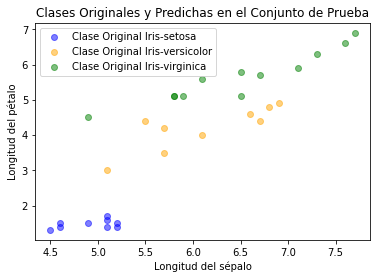

In [111]:
class_colors = {
    'Iris-setosa': 'blue',
    'Iris-versicolor': 'orange',
    'Iris-virginica': 'green'
}
# Crear un gráfico de dispersión para los datos originales
for clase, color in class_colors.items():
    plt.scatter(
        test_data[test_data['species'] == clase]['sepal_length'],
        test_data[test_data['species'] == clase]['petal_length'],
        color=color,
        label=f'Clase Original {clase}',
        alpha=0.5
    )

# Crear un gráfico de dispersión para los datos predichos
for clase in range(15):
    plt.scatter(
        test_data_copy[test_data_copy['species'] == clase]['sepal_length'],
        test_data_copy[test_data_copy['species'] == clase]['petal_length'],
        color='red',
        #label=f'Clase Predicha {clase}',
        alpha=1
    )

plt.title('Clases Originales y Predichas en el Conjunto de Prueba')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Longitud del pétalo')
plt.legend()
plt.show()